# <span style="color:red"> Lezione 2 </span>

### C++ code

* 2.1

In questo esercizio si è sfruttata la programmazione ad oggetti: `experiment.h` con la funzione `cicleblock_integral(vector<double>& av, vector<double>& avS, Random& rnd, int N, int L, int a, int b, FunzBase& f)` (_av_ stima integrale unif, _avS_ stima integrale sampling, _N_ numero di blocchi, _L_ numero di steps per blocco, _a_ e _b_ come estremi di integrazione, _f_ funzione base che verrà "sostituita" da classi figlie con _Eval(x)_ per unif e _Eval_sampling(x)_ per sampling; `integranda.h` classe che comprende i due spefici casi di funzione integranda e funzione integranda_sampling. Altre funzioni utili sono contenute in `funzioni.h`. Per la stima dell'integrale si è sfruttato il metodo uniforme, mentre per la stima delle incertezze, valutate sugli stessi dati per poter sottolineare le differenze, sono stati sfruttati entrambi i metodi.
Per l'andamento non uniforme si è sfruttato un'andamento lineare $(1-x)$, quindi partendo da:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
$$g(x) = \frac{\pi}{2}\cos(\pi x/2);    p(x) = 1$$
si è passati a:
$$g(x) = \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)};   p(x)=2(1-x)$$
Fruttando questo particolare andamento si è ottenuta una diminuzione delle incertezze di circa un fattore 4.

* 2.2

In questo esercizio si è sfruttata la programmazione ad oggetti: `random_walk.h` dove `Walk_cube/continuum(Random& rnd, int N, vector<double>& x, vector<double>& y, vector<double>&z)` producono un random walk o su un reticolo o nel continuo di N steps, salvando le posizioni ad ogni passo sui vector (x,y,z). Questi metodi poi sono fruttati in `r2_mean_lattice/continuum(int N, int M, Random& rnd, RandomWalk& drunk, vector<double>& r, vector<double>& x, vector<double>& y, vector<double>&z` (contenuti in `funzioni.h` oltre a funzioni di scrittura e pulizia) per generare M(=$10^4$) cammini differenti con  N(=100) steps di random walk ognuno. A loro volta questi rnd_walks sono usati per calcolare $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ e le sue incertezze.

## <span style="color:green"> Esercizio 2.1 </span>

### Python code

Definisco le funzioni per la lettura e i plot. I dati vengono caricati dall'output del codice C++ `data.dat` così composto:

1° colonna|2° colonna|3° colonna|4° colonna
----------|----------|----------|----------
numero blk|stima integrale blk|incert unif blk|incert sampl blk

In [28]:
#libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
# lettura 
def read(filename):
    x, sum_prog, err_prog, err_S_prog = np.loadtxt("2.1/"+filename,\
            usecols=(0,1,2,3), delimiter=' ', unpack='true')
    return x, sum_prog, err_prog, err_S_prog
def plot_integ(x, sum_prog, err_prog, err_S_prog):
    M=100000 # steps MC totali
    N=100 # numero di blocchi
    sigma_g = err_prog[-1]/err_S_prog[-1]
    fig = plt.figure(figsize=(14,6))
    plt.errorbar(x,sum_prog,yerr=err_prog, label='Uniform distribution', color='blue', ecolor='orange')
    plt.errorbar(x,sum_prog,yerr=err_S_prog, label='Importance sampling', color='blue', ecolor='red')
    plt.xlabel(f'#blocks, each block is made of {M/N} throws')
    plt.ylabel('Integral of f(x)')
    plt.title(r'Integral of f(x)=$\frac{\pi}{2}\cos(\pi x/2)$ ($\frac{\sigma_u}{\sigma_s}$='+f'{sigma_g})')
    plt.grid(True)
    plt.legend()
    plt.show()

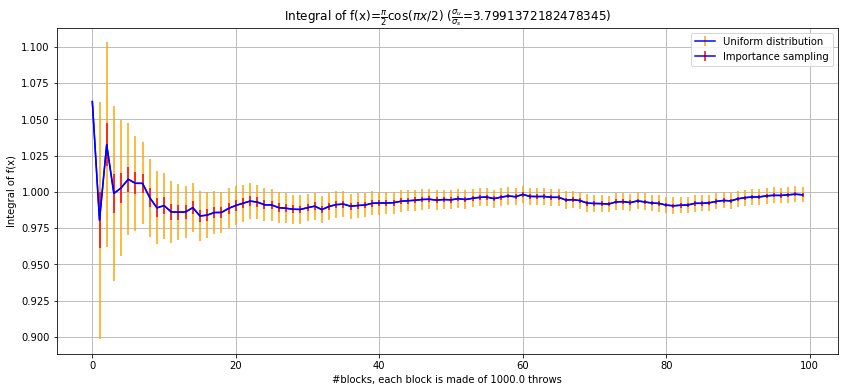

In [29]:
x, s, eu, es = read("data.dat")
plot_integ(x,s,eu,es)

# <span style="color:green"> Esercizio 2.2 </span>

### Python code

I dati vengono caricati dagli output del codice C++ `data_continuum.dat` e `data_lattice.dat` così composti:

1° colonna|2° colonna
----------|----------
$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$|incertezza

dove ogni riga indica un nuovo step. 

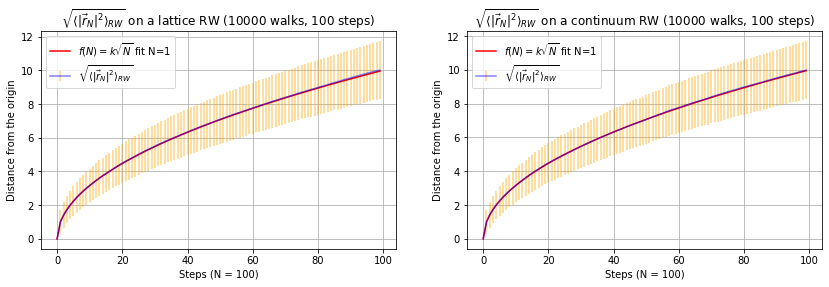

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
# parametri utili
N=100
M=10000
x = np.arange(0, 100)
f_x = x**0.5
type = ['lattice','continuum']
# carico i dati di <|r^2|> e le sue incertezze
for i in range(2):
    r, error= np.loadtxt("2.2/data_"+type[i]+".dat", \
                         usecols=(0,1), delimiter=' ', unpack='true') 
    ax[i].errorbar(x,r**0.5,yerr=error**0.5, color='blue', ecolor='orange', alpha=0.5, label=r'$ \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} $')
    ax[i].plot(x,f_x,color='red', label='$f(N)=k\sqrt{N}$ fit N=1')
    ax[i].set_xlabel(f"Steps (N = {N})")
    ax[i].set_ylabel("Distance from the origin")
    ax[i].set_title(r"$ \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} $ on a "+type[i]+f" RW ({M} walks, {N} steps)")
    ax[i].legend()
    ax[i].grid(True)
plt.show()

Possiamo vedere come l'andamento di $ \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} $ è simile a $f(N)=k\sqrt{N}$ ($k=1$), e quindi possiamo dire che ha un comportamento diffusivo.